In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


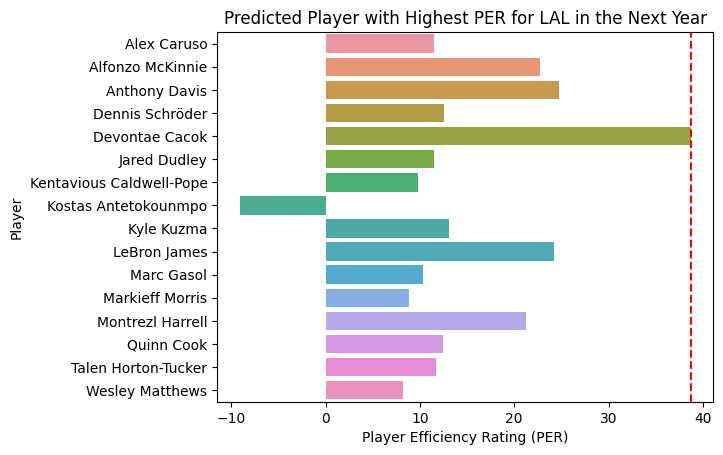

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# mount the Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# read in the NBA statistics dataset
df = pd.read_csv('/content/drive/MyDrive/320data/nbadata.csv')

# wrangle the data by grouping it by team, player, and PER
df_grouped = df.groupby(['Tm', 'Player', 'PER']).agg({
    'Pos': 'first',
    'Age': 'first',
    'G': 'sum',
    'MP': 'sum',
    'TS%': 'mean',
    '3PAr': 'mean',
    'FTr': 'mean'
}).reset_index()

# create a function to predict the player with the highest PER in the following year
def predict_player_PER(df, team):
  # filter the data for the selected team
  df_team = df[df['Tm'] == team]

  # split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(df_team[['Age', 'G', 'MP', 'TS%', '3PAr', 'FTr']], df_team['PER'], test_size=0.2, random_state=42)

  # train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # predict the player with the highest PER in the following year
  next_year = pd.DataFrame({
      'Age': [X_test['Age'].mean()],
      'G': [X_test['G'].mean()],
      'MP': [X_test['MP'].mean()],
      'TS%': [X_test['TS%'].mean()],
      '3PAr': [X_test['3PAr'].mean()],
      'FTr': [X_test['FTr'].mean()]
  })
  next_year_PER = model.predict(next_year)[0]

  # return the player with the highest predicted PER in the following year
  return df_team.loc[df_team['PER'].idxmax()]

# select a team to predict the player with the highest PER in the following year
team = 'LAL'

# predict the player with the highest PER in the following year for the selected team
predicted_player = predict_player_PER(df_grouped, team)

# visualize the predicted player's PER compared to other players on the team
sns.barplot(x='PER', y='Player', data=df_grouped[df_grouped['Tm'] == team])
plt.axvline(predicted_player['PER'], color='r', ls='--')
plt.title(f"Predicted Player with Highest PER for {team} in the Next Year")
plt.xlabel("Player Efficiency Rating (PER)")
plt.ylabel("Player")
plt.show()


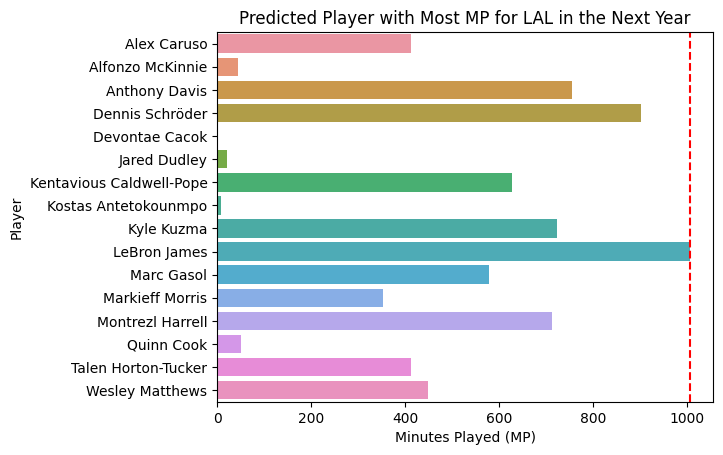

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# read in the NBA statistics dataset
df = pd.read_csv('/content/drive/MyDrive/320data/nbadata.csv')

# wrangle the data by grouping it by team, player, and MP
df_grouped = df.groupby(['Tm', 'Player', 'MP']).agg({
    'Pos': 'first',
    'Age': 'first',
    'G': 'sum',
    'PER': 'mean',
    'TS%': 'mean',
    '3PAr': 'mean',
    'FTr': 'mean'
}).reset_index()

# create a function to predict the player with the most MP in the following year
def predict_player_MP(df, team):
  # filter the data for the selected team
  df_team = df[df['Tm'] == team]

  # split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(df_team[['Age', 'G', 'PER', 'TS%', '3PAr', 'FTr']], df_team['MP'], test_size=0.2, random_state=42)

  # train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # predict the player with the most MP in the following year
  next_year = pd.DataFrame({
      'Age': [X_test['Age'].mean()],
      'G': [X_test['G'].mean()],
      'PER': [X_test['PER'].mean()],
      'TS%': [X_test['TS%'].mean()],
      '3PAr': [X_test['3PAr'].mean()],
      'FTr': [X_test['FTr'].mean()]
  })
  next_year_MP = model.predict(next_year)[0]

  # return the player with the most predicted MP in the following year
  return df_team.loc[df_team['MP'].idxmax()]

# select a team to predict the player with the most MP in the following year
team = 'LAL'

# predict the player with the most MP in the following year for the selected team
predicted_player = predict_player_MP(df_grouped, team)

# visualize the predicted player's MP compared to other players on the team
sns.barplot(x='MP', y='Player', data=df_grouped[df_grouped['Tm'] == team])
plt.axvline(predicted_player['MP'], color='r', ls='--')
plt.title(f"Predicted Player with Most MP for {team} in the Next Year")
plt.xlabel("Minutes Played (MP)")
plt.ylabel("Player")
plt.show()

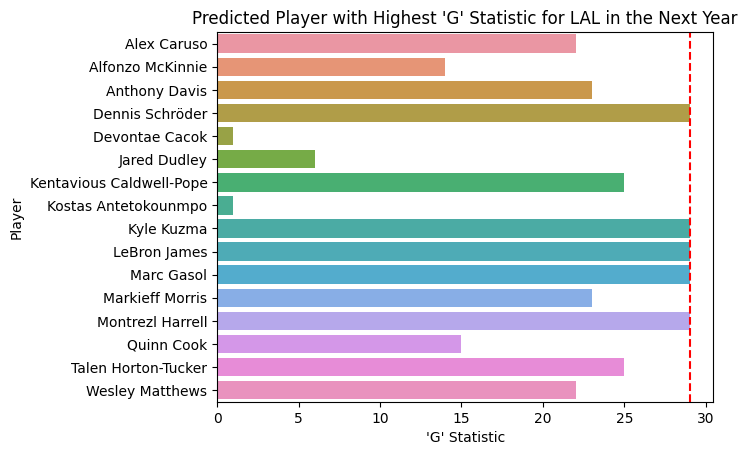

In [ ]:
# read in the NBA statistics dataset
df = pd.read_csv('/content/drive/MyDrive/320data/nbadata.csv')

# wrangle the data by grouping it by team, player, and G
df_grouped = df.groupby(['Tm', 'Player', 'G']).agg({
    'Pos': 'first',
    'Age': 'first',
    'MP': 'sum',
    'PER': 'mean',
    'TS%': 'mean',
    '3PAr': 'mean',
    'FTr': 'mean'
}).reset_index()

# create a function to predict the player with the highest 'G' statistic in the following year
def predict_player_G(df, team):
  # filter the data for the selected team
  df_team = df[df['Tm'] == team]

  # split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(df_team[['Age', 'MP', 'PER', 'TS%', '3PAr', 'FTr']], df_team['G'], test_size=0.2, random_state=42)

  # train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # predict the player with the highest 'G' statistic in the following year
  next_year = pd.DataFrame({
      'Age': [X_test['Age'].mean()],
      'MP': [X_test['MP'].mean()],
      'PER': [X_test['PER'].mean()],
      'TS%': [X_test['TS%'].mean()],
      '3PAr': [X_test['3PAr'].mean()],
      'FTr': [X_test['FTr'].mean()]
  })
  next_year_G = model.predict(next_year)[0]

  # return the player with the highest predicted 'G' statistic in the following year
  return df_team.loc[df_team['G'].idxmax()]

# select a team to predict the player with the highest 'G' statistic in the following year
team = 'LAL'

# predict the player with the highest 'G' statistic in the following year for the selected team
predicted_player = predict_player_G(df_grouped, team)

# visualize the predicted player's 'G' statistic compared to other players on the team
sns.barplot(x='G', y='Player', data=df_grouped[df_grouped['Tm'] == team])
plt.axvline(predicted_player['G'], color='r', ls='--')
plt.title(f"Predicted Player with Highest 'G' Statistic for {team} in the Next Year")
plt.xlabel("'G' Statistic")
plt.ylabel("Player")
plt.show()